# Imports

In [1]:
import os
import pandas as pd
import numpy as np


from orbit_generation.experiment import read_json_to_dataframe, plot_corr_matrix, create_experiment_image_grid

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Imports

In [3]:
experiments_folder = r'../experiments'
experiments_file = r'../experiments/experiments.json'
results_folder = r'../experiments/results'
generated_orbits_path = os.path.join(results_folder, 'generated_orbits')
refined_orbits_path = os.path.join(results_folder, 'refined_orbits')
latent_space_with_distributions_path = os.path.join(results_folder, 'latent_space_label_distribution')
metrics_corr_matrix_path = os.path.join(results_folder, 'metrics_corr_matrix')

## Experiment Metrics

In [4]:
df=read_json_to_dataframe(experiments_file)

In [5]:
df = df[df['id'] == 23]
df.shape

(1, 98)

In [6]:
# Check for columns with NaN values
nan_columns = df.isna().sum()
num_nan_columns = (nan_columns > 0).sum()

# print(nan_columns[nan_columns > 0])

# Drop columns with NaN values
df = df.dropna(axis=1)
df.shape

(1, 28)

In [7]:
parameters_df = df['parameters'].apply(pd.Series)

# Join the newly created columns back to the original DataFrame
df = pd.concat([df, parameters_df], axis=1)

# Drop the original 'parameters' column
df = df.drop(columns=['parameters'])
df = df.drop(columns=['id'])

# Display the resulting DataFrame
df.head()

,id_experiment,position_error,velocity_error,energy_error,val_total_loss,val_reconstruction_loss,val_kl_loss,train_total_loss,train_reconstruction_loss,train_kl_loss,family_ari,family_nmi,family_homogeneity,family_completeness,family_v-measure,family_fmi,family_purity,family_silhouette_score,family_jaccard,family_accuracy,disorder_metric,correct_order,inversions,kendall_tau_distance,discarded_families,discarded_family_ids,data_used,families_to_discard,seq_len,feature_dim,epochs,val_split,batch_size,lr,model_name,latent_dim,model_kwargs,max_iter_convergence,input_seq_len_convergence,samples_to_generate,distance_metric
22,23,0.250012,0.427697,1.809727,5.594227,1.905501,3.688725,6.032435,2.237585,3.79485,0.540603,0.815773,0.792162,0.840836,0.815773,0.569641,0.696975,0.556115,0.020719,0.629847,277.78,63.956667,178.746667,0.074156,"[S_L3_A, S_DPO, S_L4_A, S_L1_A, S_L2_L, S_L5_V...","[17.0, 4.0, 22.0, 7.0, 15.0, 29.0, 37.0, 11.0,...",EM_N_fix_1500,10,100,7,15,0.05,32,0.001,inception_time_wp_vae,2,"{'beta': 1, 'n_filters': 32, 'kernel_sizes': [...",20,100,100,euclidean


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


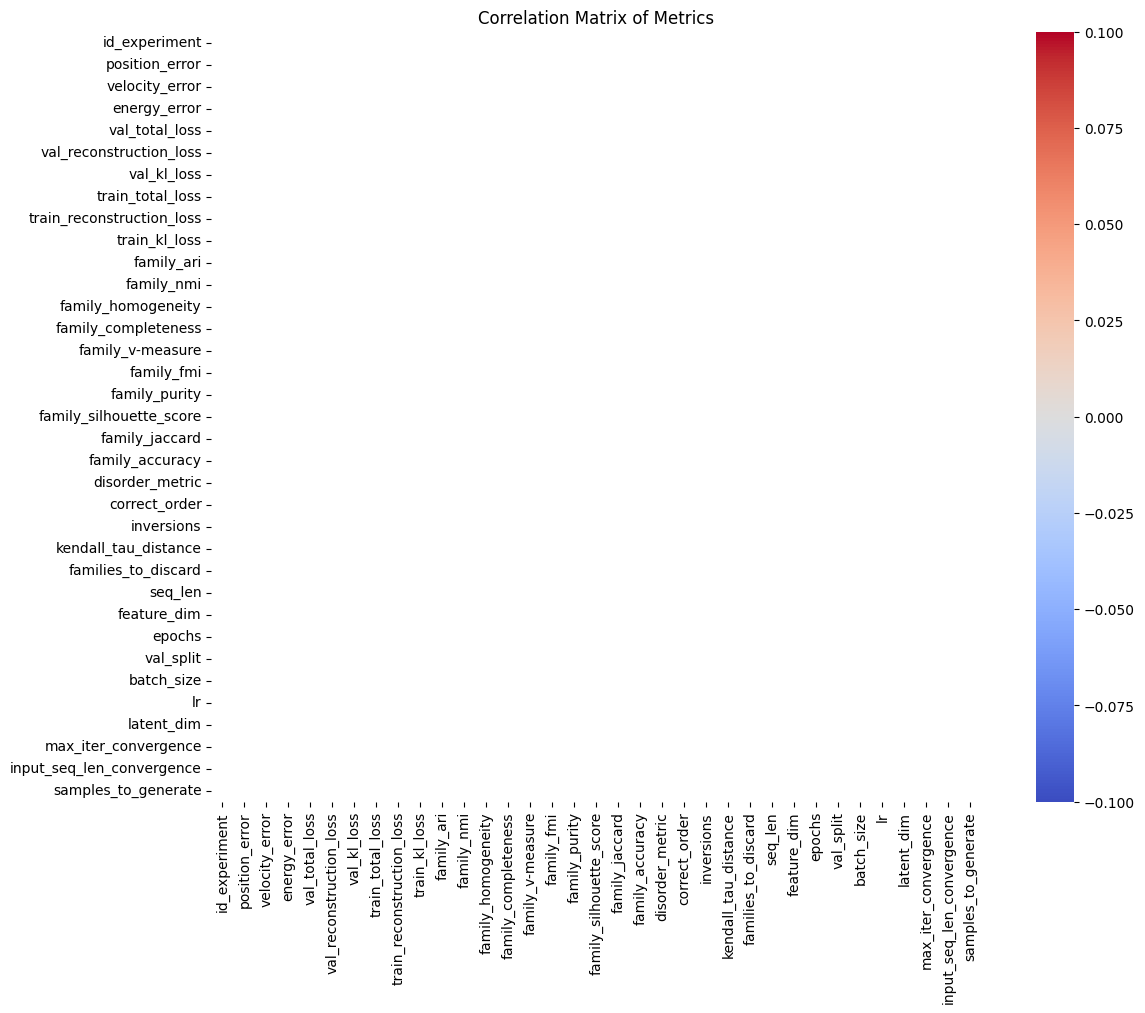

In [8]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
plot_corr_matrix(df[numeric_columns])

## Orbit Metrics

In [9]:
import os
import pandas as pd
import re

def concatenate_csvs_from_experiment_folder(experiments_folder, file_suffix):
    dataframes = []
    
    for folder in os.listdir(experiments_folder):
        if folder.startswith('experiment_') and os.path.isdir(os.path.join(experiments_folder, folder)):
            # Extract the experiment number using regex
            match = re.search(r'experiment_(\d+)', folder)
            if match:
                experiment_id = match.group(1)
                csv_file_path = os.path.join(experiments_folder, folder, f'exp{experiment_id}_{file_suffix}.csv')
                
                if os.path.isfile(csv_file_path):
                    # Load the CSV file into a DataFrame
                    df = pd.read_csv(csv_file_path)
                    
                    # Add a column to identify the experiment
                    df['experiment_id'] = experiment_id
                    
                    dataframes.append(df)
    
    # Concatenate all DataFrames along rows
    if dataframes:
        return pd.concat(dataframes, axis=0, ignore_index=True)
    else:
        return pd.DataFrame() # return an empty DataFrame if no valid files are found

In [22]:
generation_df = concatenate_csvs_from_experiment_folder(experiments_folder,'generation_df')
generation_df.shape

(1200, 10)

In [23]:
generation_df['experiment_id'].value_counts()

experiment_id
15    500
23    300
19    200
16    100
13    100
Name: count, dtype: int64

In [24]:
generation_df = generation_df[generation_df['experiment_id'] == str(23)]
generation_df.shape

(300, 10)

In [25]:
generation_df.head()

,position_error,velocity_error,energy_error,disorder_metric,correct_order,inversions,kendall_tau_distance,nearest_orbit,nearest_orbit_distance,experiment_id
200,0.204775,0.684061,4.716598,28.0,89.0,14.0,0.005689,44578,3.980216,23
201,0.122976,0.378417,10.013033,92.0,74.0,51.0,0.020694,38120,3.424277,23
202,0.155926,0.270953,9.231605,98.0,70.0,56.0,0.022695,34154,1.361354,23
203,0.044715,0.117407,0.083543,142.0,60.0,87.0,0.035351,3028,2.670191,23
204,0.064736,0.194818,0.124165,356.0,62.0,222.0,0.093183,10413,1.944123,23


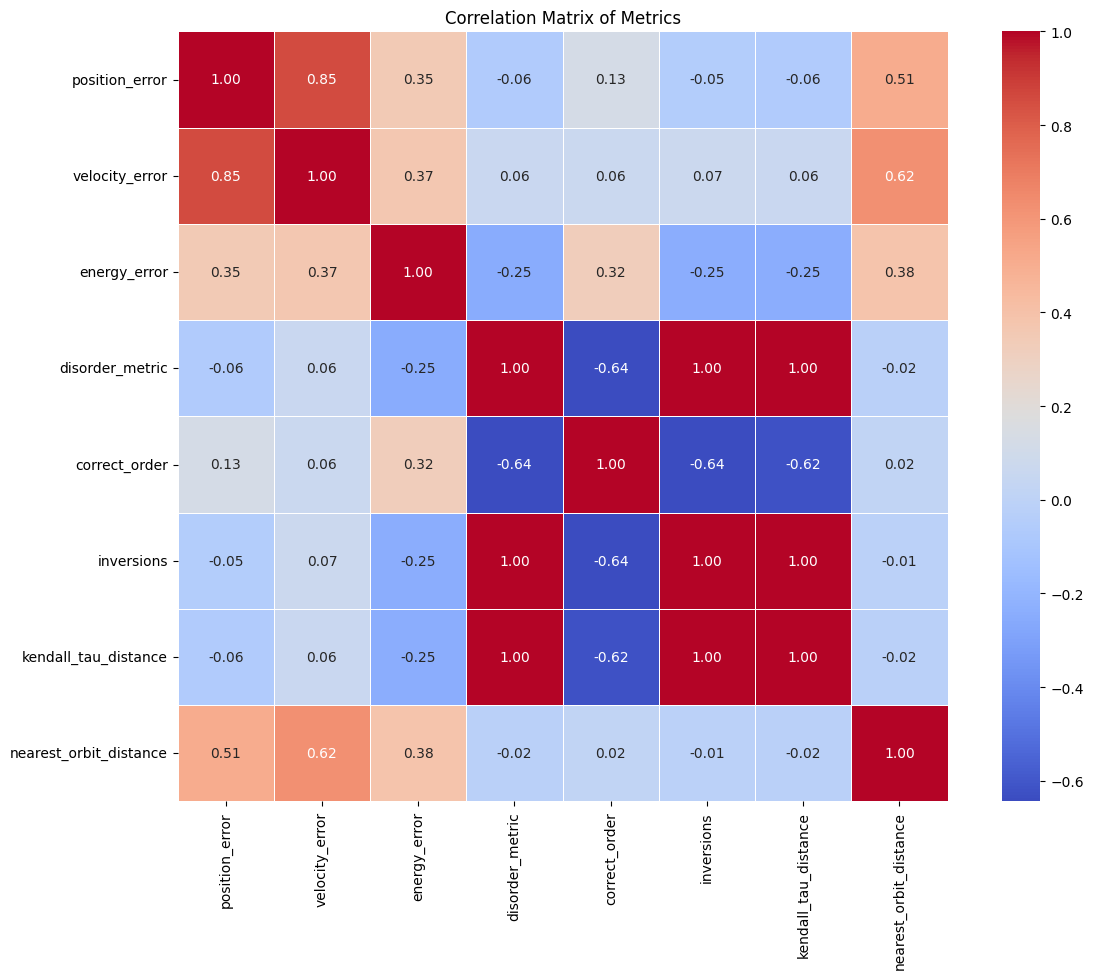

In [32]:
plot_corr_matrix(generation_df.drop(columns=['experiment_id','nearest_orbit']))

In [26]:
refined_orbits_df = concatenate_csvs_from_experiment_folder(experiments_folder,'refined_orbits_df')
refined_orbits_df.shape

(491, 58)

In [27]:
refined_orbits_df = refined_orbits_df[refined_orbits_df['experiment_id'] == str(23)]
refined_orbits_df.shape

(96, 58)

In [35]:
refined_orbits_df = refined_orbits_df.dropna(axis=1)
refined_orbits_df.shape

(96, 44)

In [36]:
refined_orbits_df.head()

,id,old_period,period,iterations_convergence,error,initial_pos_x0,initial_pos_y0,initial_pos_z0,initial_vel_x0,initial_vel_y0,initial_vel_z0,final_pos_x0,final_pos_y0,final_pos_z0,final_vel_x0,final_vel_y0,final_vel_z0,disorder_metric,correct_order,inversions,kendall_tau_distance,propagated_position_error,propagated_velocity_error,propagated_energy_error,latent_distance_to_generation,calculated_jacobi,period_distance_with_generation,feature_closest_orbit,feature_distance_from_closest_orbit,nearest_orbit,nearest_orbit_distance,distance_from_generation,centroid_distance,feature_centroid_distance,closest_family_centroid,closest_family_centroid_distance,closest_family_feature_centroid,closest_family_feature_centroid_distance,initial_conditions_distance,closest_family_full_centroid,closest_family_full_centroid_distance,family_of_feature_closest_orbit,family_of_closest_orbit,experiment_id
63,2.0,6.015932,6.269739,18.0,1.750487e-11,0.195696,0.108707,0.055770,-0.015940,3.947103,0.016973,0.198585,-0.025991,-6.383230e-17,0.159060,2.671047,3.269417e-15,94.0,70.0,55.0,0.022222,1.604667e-12,5.158039e-12,5.008831e-11,0.085387,2.227825,0.253808,34685.0,0.000116,5092.0,2.712217,4.399190,0.967011,0.999224,20.0,0.087295,29.0,0.181905,1.296339,29.0,0.099303,32.0,5.0,23
64,7.0,3.329923,3.397226,11.0,1.291115e-12,0.969681,0.001888,0.021506,0.015409,0.093883,-0.068099,1.129500,-0.009888,-1.261622e-15,-0.002363,0.131290,2.538893e-14,276.0,62.0,181.0,0.073131,1.339571e-12,2.484736e-12,3.730349e-14,0.129475,3.172267,0.067303,17970.0,0.000453,17973.0,0.371865,1.371663,0.885134,3.931877,8.0,0.149518,6.0,0.643249,0.180267,3.0,0.062636,15.0,15.0,23
65,10.0,9.795383,12.389617,13.0,2.733556e-13,0.965878,-0.249973,0.009874,0.038999,0.776029,0.031629,0.569196,-1.143545,-9.557926e-15,-0.418359,0.080683,4.791488e-15,134.0,80.0,81.0,0.032727,2.210193e-12,2.367034e-12,1.208461e-14,0.093221,3.022210,2.594233,41632.0,0.045814,35706.0,9.442332,7.666517,1.609862,5.173377,17.0,0.628318,36.0,0.304440,1.284370,36.0,0.626888,39.0,33.0,23
66,11.0,5.305003,4.422004,8.0,6.161111e-11,1.023620,-0.055717,0.121162,-0.020475,-0.204854,0.312339,1.075758,-0.053617,1.375716e-01,-0.173918,-0.076805,3.127483e-01,144.0,69.0,88.0,0.035556,1.474056e-12,4.133549e-12,8.130946e-12,0.257042,2.979148,0.882999,12841.0,0.000002,12808.0,1.396974,2.009221,0.727293,2.889137,8.0,0.087361,11.0,0.062763,0.207204,11.0,0.088225,12.0,12.0,23
67,12.0,11.299368,12.494985,11.0,1.320579e-10,0.491438,-0.165805,0.053263,-0.333114,2.562464,0.055236,0.283720,-0.165281,1.053249e-11,0.388326,1.929158,8.115873e-11,98.0,73.0,54.0,0.021818,3.191574e-12,6.781526e-12,9.680663e-11,0.221489,2.110607,1.195617,35041.0,0.000371,35030.0,5.513189,5.589581,2.591882,5.249877,21.0,0.392354,30.0,0.820260,0.985184,30.0,0.379495,33.0,33.0,23


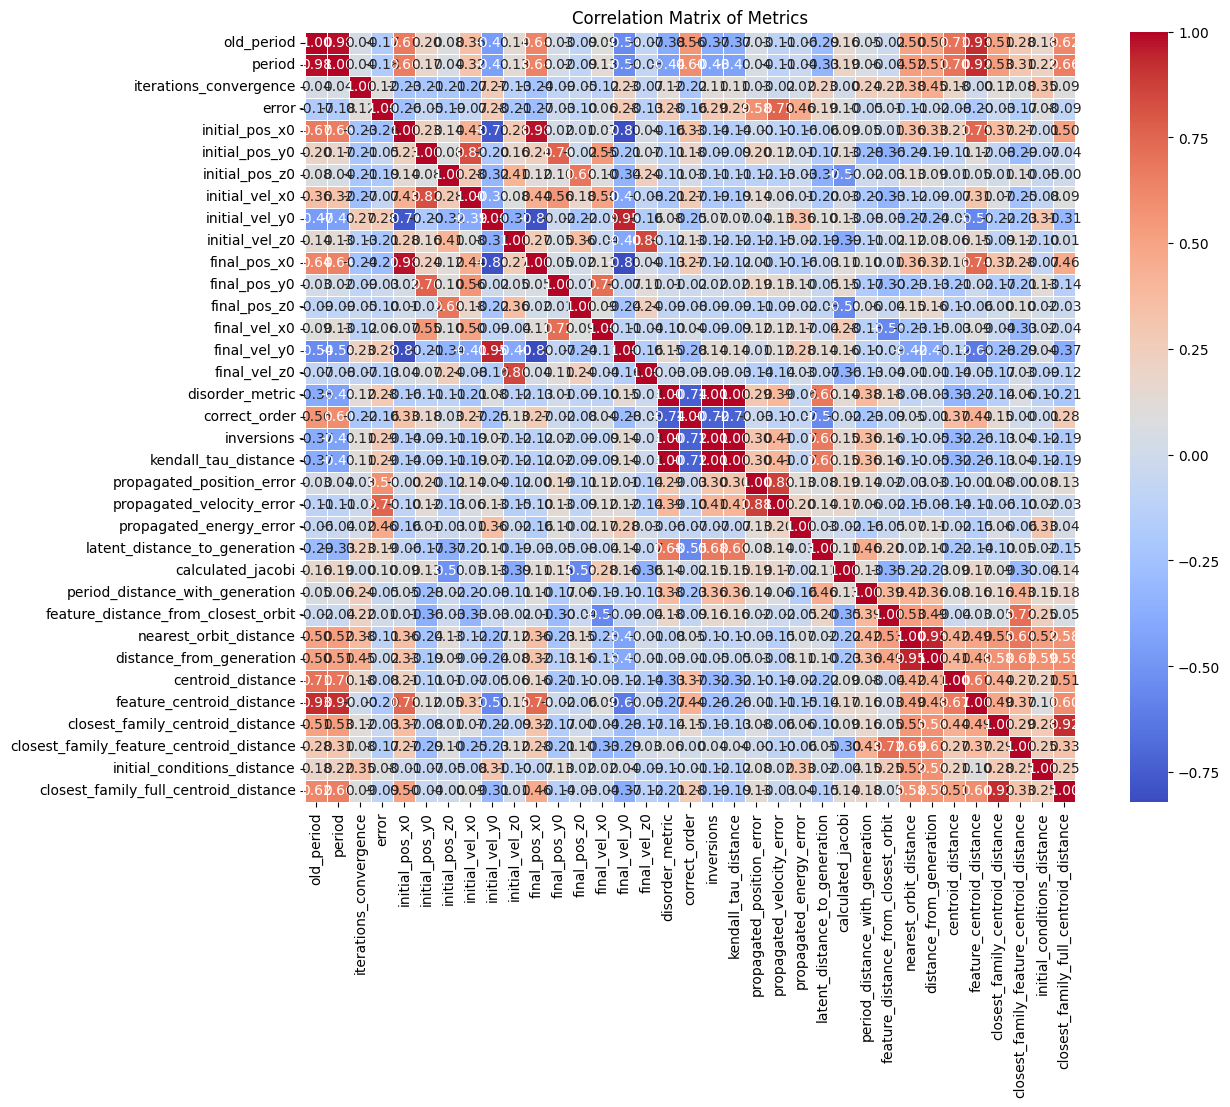

In [38]:
not_to_show_columns = ['id', 'experiment_id','nearest_orbit', 'feature_closest_orbit', 'nearest_orbit', 'closest_family_centroid', 'closest_family_feature_centroid', 'closest_family_full_centroid', 'family_of_feature_closest_orbit', 'family_of_closest_orbit']
plot_corr_matrix(refined_orbits_df.drop(columns=not_to_show_columns))

# Plots

## Generated Orbits

In [18]:
# create_experiment_image_grid(experiments_folder, 'all_generated_data.png', font_size=100, crop_length=100, save_path=generated_orbits_path)